In [ ]:
!pip install ipython==7.34.0 ipykernel==5.5.6
!pip install import_ipynb

In [15]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import dolfin
else:
    try:
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import dolfin

import numpy as np
import matplotlib.pyplot as plt
import mshr
import fenics as fe

In [16]:
from google.colab import drive
drive.mount('/content/drive')
import os
import import_ipynb

path = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/generate_data'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from vessel_geometry import generate_vessel_geometry
from boundaries import define_boundaries
from navier_stokes import solve_navier_stokes
from visualize_geometry import visualize
from generate_random_geometries import random_vessel_type, random_vessel_params

In [5]:
def to_meters(size):
  return size * 10**(-6)

In [6]:
def get_inflow_profile(height, max_velocity):
  inflow_profile = (f'4 * {max_velocity} * x[1] / {height} * (1 - x[1] / {height})', '0')     # inflow velocity min: 500 micrometers/sec, max: 1800 micrometers/sec
  return inflow_profile

In [7]:
def define_function_spaces(mesh):
  V = fe.VectorFunctionSpace(mesh, 'P', 2)
  Q = fe.FunctionSpace(mesh, 'P', 1)

  return V, Q

In [39]:
T = 0.5                   # final time
num_steps = 2501          # number of time steps
dt = T / num_steps        # time step size
mu_scalar = 0.0035        # dynamic viscosity
rho_scalar = 1060         # density

branch
{'branch': {'branch_width': 6.916415893722446e-06, 'branch_angle': 5.811894064252849e-07, 'branch_position_x': 2.413090986422204e-06, 'undulation_amplitude': 3.3169053354893183e-07, 'undulation_frequency': 1.4167492941189386, 'oscilations': 4}}


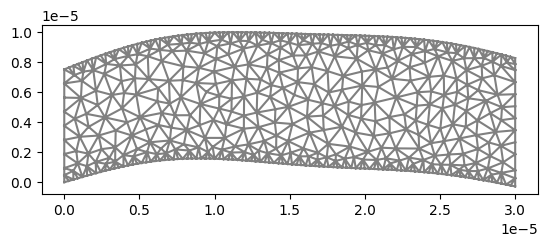

In [52]:
target_resolution = 16
length, height = 30, 7.5  # height min: 5 micrometers, max: 10 micrometers

vessel_type = random_vessel_type()
print(vessel_type)
vessel_params = random_vessel_params(vessel_type, length, height)
print(vessel_params)

length, height = to_meters(length), to_meters(height)
domain = generate_vessel_geometry(vessel_type, length, height, params=vessel_params)

mesh = mshr.generate_mesh(domain, target_resolution)
fe.plot(mesh)

isthmus
{'isthmus': {'isthmus_height': 2.627904197261912e-06, 'isthmus_width': 7.231358744508203e-06, 'isthmus_position': 1.9009648806073917e-05, 'undulation_amplitude': 2.8881230421773437e-07, 'undulation_frequency': 1.531540154518694}}


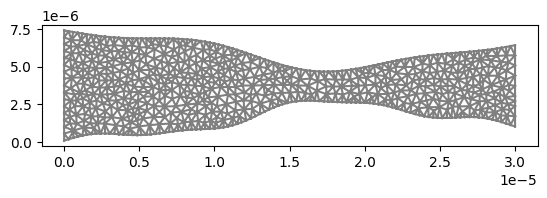

In [45]:
target_resolution = 32
length, height = 30, 7.5  # height min: 5 micrometers, max: 10 micrometers

vessel_type = 'isthmus'
print(vessel_type)
vessel_params = random_vessel_params(vessel_type, length, height)
print(vessel_params)

length, height = to_meters(length), to_meters(height)
domain = generate_vessel_geometry(vessel_type, length, height, params=vessel_params)

mesh = mshr.generate_mesh(domain, target_resolution)
fe.plot(mesh)

Time step n: 0, Velocity: [0.00007, 0.00271], Pressure: [0.00000, 0.00019]
Time step n: 500, Velocity: [0.00007, 0.00274], Pressure: [0.00000, 0.09572]
Time step n: 1000, Velocity: [0.00007, 0.00274], Pressure: [0.00000, 0.19117]
Time step n: 1500, Velocity: [0.00007, 0.00274], Pressure: [0.00000, 0.28654]
Time step n: 2000, Velocity: [0.00007, 0.00274], Pressure: [0.00000, 0.38182]
Time step n: 2500, Velocity: [0.00006, 0.00273], Pressure: [0.00000, 0.47701]


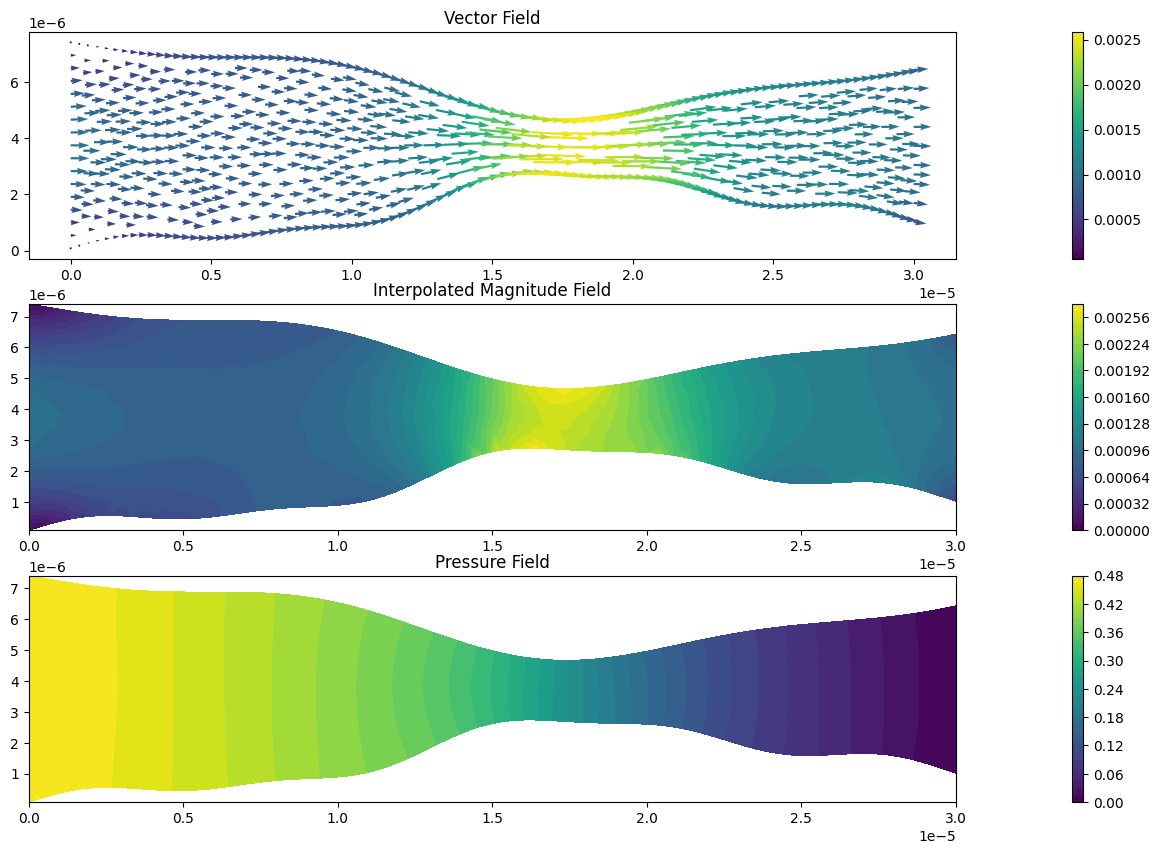

In [46]:
V, Q = define_function_spaces(mesh)
boundaries = define_boundaries(mesh, length, height)
max_velocity = to_meters(1000)
inflow_profile = get_inflow_profile(height, max_velocity)

u_, p_ = solve_navier_stokes(V, Q, mesh, boundaries, inflow_profile, dt, mu_scalar, rho_scalar, num_steps, 'bicgstab')

visualize(u=u_, p=p_)